In [6]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [7]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

### Models Training

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)

In [16]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

In [18]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

In [22]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100)
abc.fit(x_train, y_train)
abc_pred = abc.predict(x_test)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)

### Error Analysis

In [24]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [26]:
error_df = {
    'Model': ['KNN', 'Decision Tree', 'Naive Bayes', 'SVM', 'Random Forest', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [knn.score(x_test, y_test), dtc.score(x_test, y_test), nb.score(x_test, y_test), svc.score(x_test, y_test), rfc.score(x_test, y_test), abc.score(x_test, y_test), gbc.score(x_test, y_test)],
    'Error Rate': [1-knn.score(x_test, y_test), 1-dtc.score(x_test, y_test), 1-nb.score(x_test, y_test), 1-svc.score(x_test, y_test), 1-rfc.score(x_test, y_test), 1-abc.score(x_test, y_test), 1-gbc.score(x_test, y_test)],
    'F1 Score': [f1_score(y_test, knn_pred), f1_score(y_test, dtc_pred), f1_score(y_test, nb_pred), f1_score(y_test, svc_pred), f1_score(y_test, rfc_pred), f1_score(y_test, abc_pred), f1_score(y_test, gbc_pred)],
    'Precision': [precision_score(y_test, knn_pred), precision_score(y_test, dtc_pred), precision_score(y_test, nb_pred), precision_score(y_test, svc_pred), precision_score(y_test, rfc_pred), precision_score(y_test, abc_pred), precision_score(y_test, gbc_pred)],
    'Recall': [recall_score(y_test, knn_pred), recall_score(y_test, dtc_pred), recall_score(y_test, nb_pred), recall_score(y_test, svc_pred), recall_score(y_test, rfc_pred), recall_score(y_test, abc_pred), recall_score(y_test, gbc_pred)],
}
error_df = pd.DataFrame(error_df)
error_df

,Model,Accuracy,Error Rate,F1 Score,Precision,Recall
0,KNN,0.714286,0.285714,0.551020,0.613636,0.500000
1,Decision Tree,0.766234,0.233766,0.608696,0.736842,0.518519
2,Naive Bayes,0.766234,0.233766,0.653846,0.680000,0.629630
3,SVM,0.753247,0.246753,0.586957,0.710526,0.500000
4,Random Forest,0.792208,0.207792,0.686275,0.729167,0.648148
5,AdaBoost,0.805195,0.194805,0.693878,0.772727,0.629630
6,Gradient Boosting,0.766234,0.233766,0.625000,0.714286,0.555556


### Confusion Matrix

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

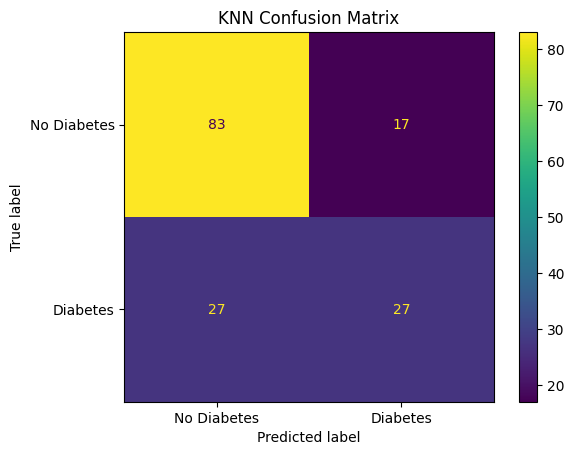

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay\

cm = confusion_matrix(y_test, knn_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes'])
cmd.plot()
plt.title('KNN Confusion Matrix')
plt.show()


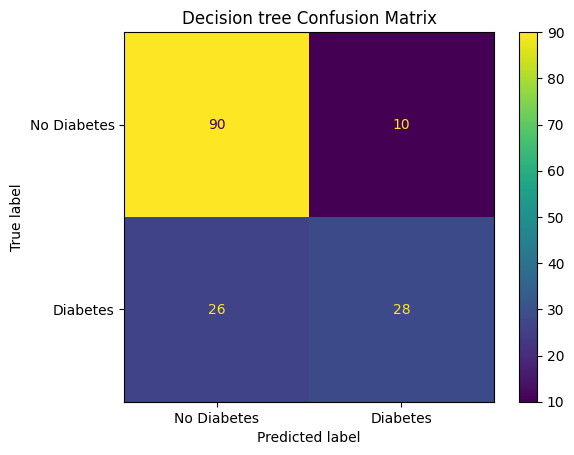

In [38]:
cm = confusion_matrix(y_test, dtc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes'])
cmd.plot()
plt.title('Decision tree Confusion Matrix')
plt.show()

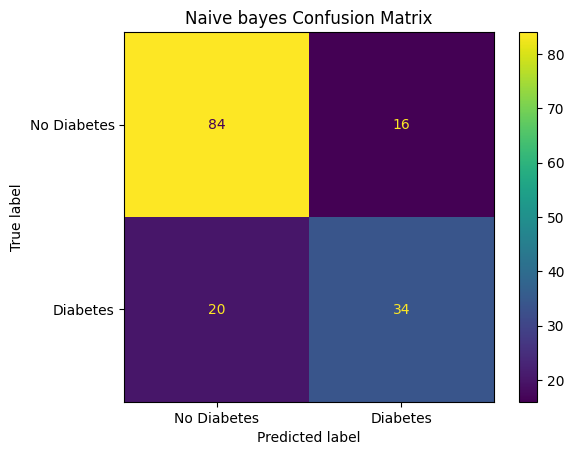

In [39]:
cm = confusion_matrix(y_test, nb_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes'])
cmd.plot()
plt.title('Naive bayes Confusion Matrix')
plt.show()

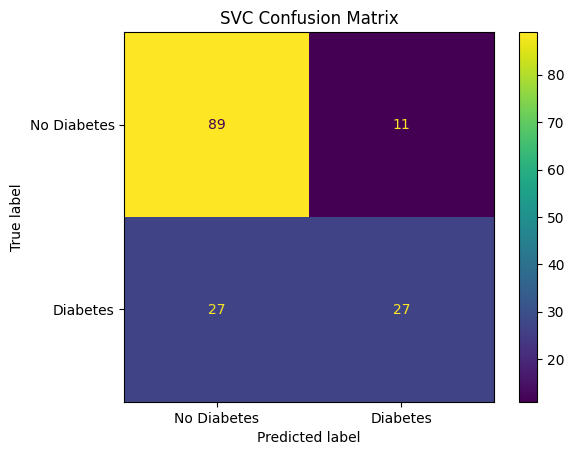

In [36]:
cm = confusion_matrix(y_test, svc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes'])
cmd.plot()
plt.title('SVC Confusion Matrix')
plt.show()

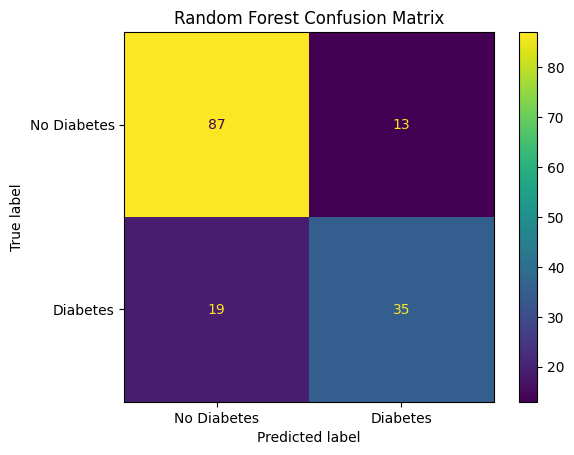

In [40]:
cm = confusion_matrix(y_test, rfc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes'])
cmd.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

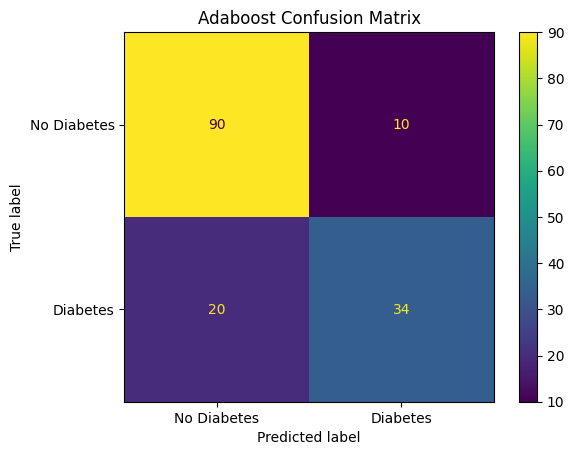

In [42]:
cm = confusion_matrix(y_test, abc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes'])
cmd.plot()
plt.title('Adaboost Confusion Matrix')
plt.show()


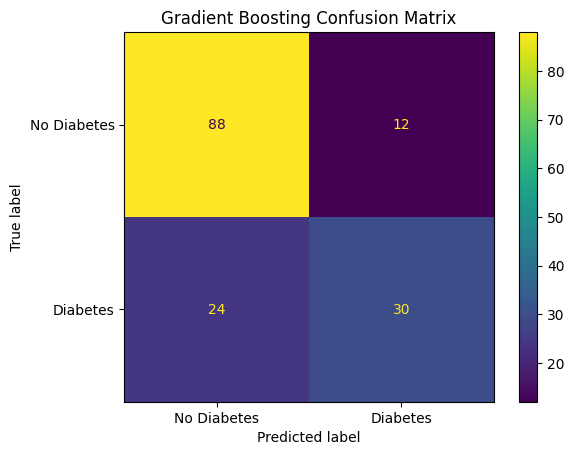

In [43]:
cm = confusion_matrix(y_test, gbc_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Diabetes'])
cmd.plot()
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

### ROC-Curves

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


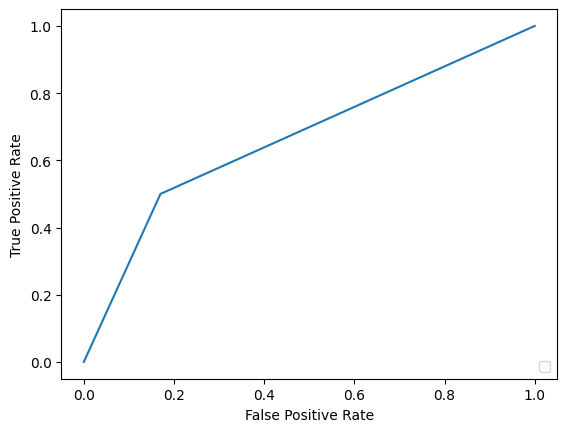

In [51]:
# knn
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_test, knn_pred, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


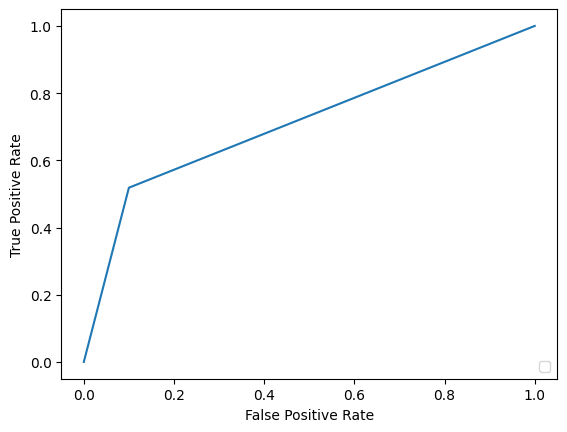

In [52]:
# dtc
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_test, dtc_pred, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


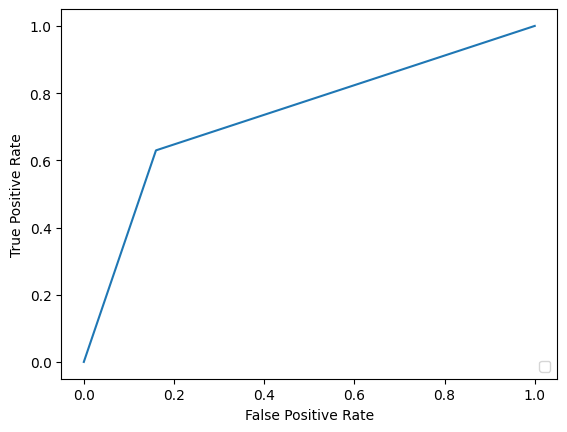

In [53]:
# Naive Bayes
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_test, nb_pred, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


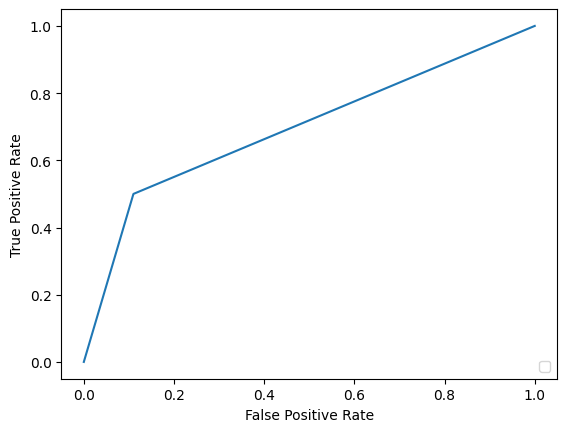

In [54]:
# svc
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_test, svc_pred, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


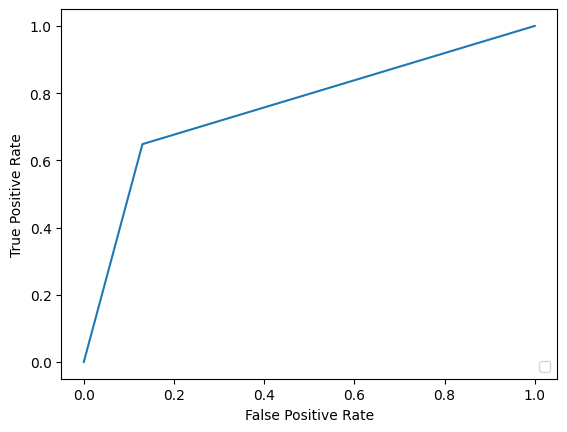

In [55]:
# rfc
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_test, rfc_pred, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


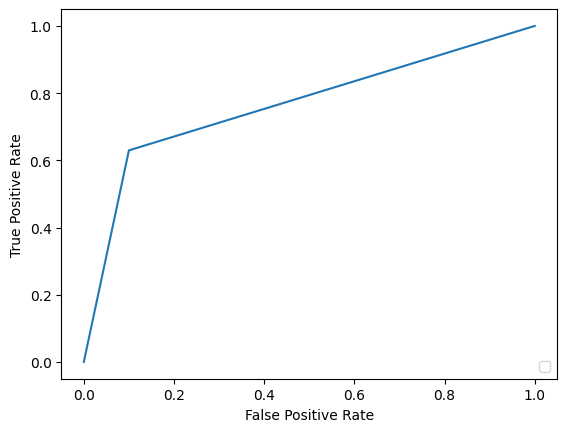

In [56]:
# abc
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_test, abc_pred, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


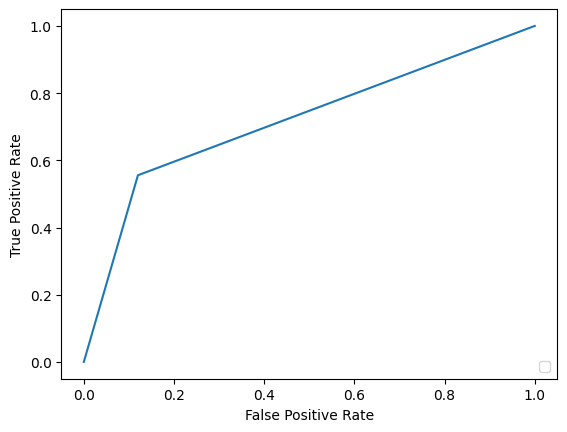

In [57]:
# gbc
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_test, gbc_pred, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()